<a href="https://colab.research.google.com/github/Bucephalus-lgtm/Best-README-Template/blob/master/Image_processing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
import numpy as np
import matplotlib.pyplot as plt

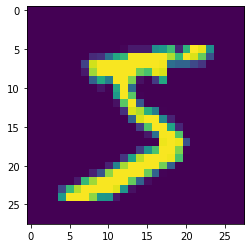

In [69]:
img = X_train[0].reshape(28,28)

plt.imshow(img)

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

In [7]:
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train /= 255
X_test /= 255

In [9]:
n_classes = 10

In [10]:
print("Shape before One Hot Encoding...", y_train.shape)

Shape before One Hot Encoding... (60000,)


In [11]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [12]:
print("Shape after One Hot Encoding...", y_train.shape)

Shape after One Hot Encoding... (60000, 10)


In [13]:
model = Sequential()

In [15]:
model.add(Dense(10, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9313 - accuracy: 0.7005 - val_loss: 0.3861 - val_accuracy: 0.8901
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.9010 - val_loss: 0.3080 - val_accuracy: 0.9116
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.9143 - val_loss: 0.2868 - val_accuracy: 0.9173
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2820 - accuracy: 0.9200 - val_loss: 0.2705 - val_accuracy: 0.9219
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2665 - accuracy: 0.9242 - val_loss: 0.2554 - val_accuracy: 0.9251
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.9274 - val_loss: 0.2476 - val_accuracy: 0.9281
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.9301 - val_loss: 0.2382 - val_accuracy: 0.9313
Epoch 

<h2>Now we will build a CNN to optimize the accuracy of our model.</h2>

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
X_train.shape

(60000, 784)

In [24]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
cnn_model = Sequential()

cnn_model.add(Conv2D(25, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D(pool_size=(1, 1)))

cnn_model.add(Flatten())

cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [36]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 44s 93ms/step - loss: 0.2020 - accuracy: 0.9426 - val_loss: 0.0759 - val_accuracy: 0.9776
Epoch 2/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0524 - val_accuracy: 0.9829
Epoch 3/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 4/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0437 - val_accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0468 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0524 - val_accuracy:

In [88]:
np.argmax(cnn_model.predict(X_test)[89])

1

In [89]:
np.argmax(y_test[89])

1

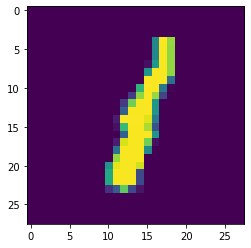

In [87]:
image = X_test[89].reshape(28, 28)

plt.imshow(image)